In [6]:
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np  
from scipy.stats import pearsonr  
from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler  
import seaborn as sns  
import warnings  
import re  
from statsmodels.tsa.api import VAR  
from statsmodels.tsa.stattools import adfuller, grangercausalitytests  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22032 entries, 0 to 22031
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Measure                22032 non-null  object 
 1   Country                22032 non-null  object 
 2   Sex                    22032 non-null  object 
 3   Age.Range              22032 non-null  object 
 4   Cause                  22032 non-null  object 
 5   Metric                 22032 non-null  object 
 6   Year                   22032 non-null  int64  
 7   Rate                   22032 non-null  float64
 8   GDP_ProCap_USD2010     21284 non-null  float64
 9   UnemploymentRate       22032 non-null  float64
 10  SuicCrime              22032 non-null  object 
 11  Geo_Region             22032 non-null  object 
 12  HeatDeaths             22032 non-null  int64  
 13  HeatWave               22032 non-null  object 
 14  CivilWar               22032 non-null  obje

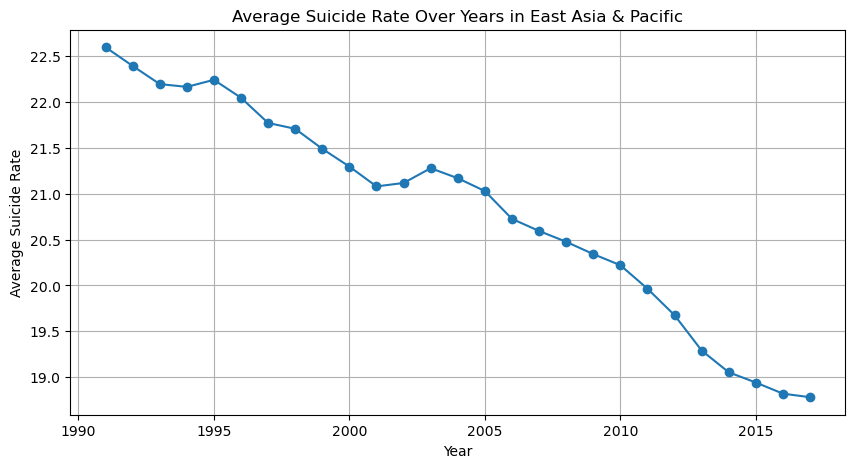

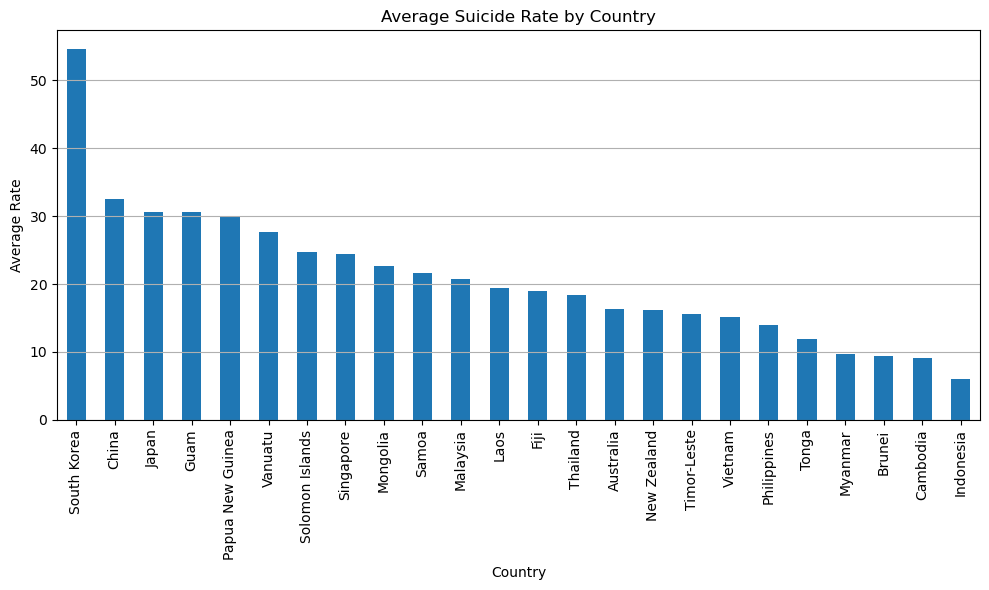

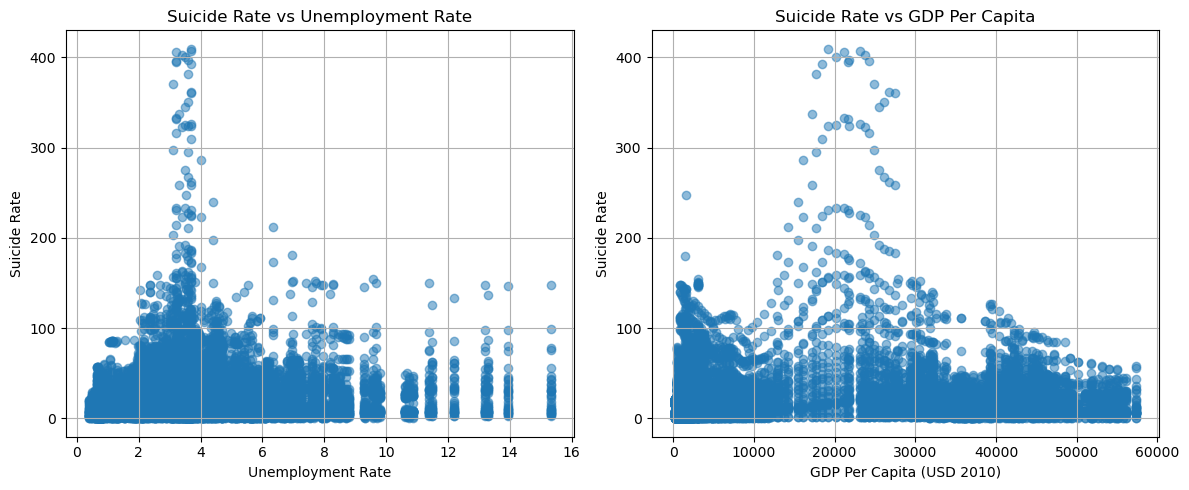

Pearson correlation between Suicide Rate and Unemployment Rate: 0.048, p-value=6.6e-13
Pearson correlation between Suicide Rate and GDP Per Capita: 0.056, p-value=1.47e-16


In [3]:

# Load East Asia & Pacific suicide rate data  
file_path = 'East_Asia_and_Pacific_Data.csv'  # Use the previously filtered file path  
data = pd.read_csv(file_path)  

# 1. Data preprocessing  
print("Data info:")  
print(data.info())  
print("\nMissing values per column:")  
print(data.isnull().sum())  

# Fill missing values (fill GDP and Unemployment Rate with median)  
data['GDP_ProCap_USD2010'] = data['GDP_ProCap_USD2010'].fillna(data['GDP_ProCap_USD2010'].median())  
data['UnemploymentRate'] = data['UnemploymentRate'].fillna(data['UnemploymentRate'].median())  

# Remove abnormal negative suicide rate data  
data = data[data['Rate'] >= 0].copy()  

# 2. Descriptive statistics  
print("\nSuicide Rate statistics:")  
print(data['Rate'].describe())  

# 3. Trend analysis: Average suicide rate trend by year  
plt.figure(figsize=(10, 5))  
yearly_avg = data.groupby('Year')['Rate'].mean()  
plt.plot(yearly_avg.index, yearly_avg.values, marker='o')  
plt.title('Average Suicide Rate Over Years in East Asia & Pacific')  
plt.xlabel('Year')  
plt.ylabel('Average Suicide Rate')  
plt.grid(True)  
plt.show()  

# 4. Comparison of average suicide rate by country  
plt.figure(figsize=(10, 6))  
country_avg = data.groupby('Country')['Rate'].mean().sort_values(ascending=False)  
country_avg.plot(kind='bar')  
plt.title('Average Suicide Rate by Country')  
plt.ylabel('Average Rate')  
plt.xlabel('Country')  
plt.xticks(rotation=90)  
plt.grid(axis='y')  
plt.tight_layout()  
plt.show()  

# 5. Correlation analysis: Relationship between suicide rate, unemployment rate, and GDP per capita  
# Scatter plots and Pearson correlation coefficient  

plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)  
plt.scatter(data['UnemploymentRate'], data['Rate'], alpha=0.5)  
plt.xlabel('Unemployment Rate')  
plt.ylabel('Suicide Rate')  
plt.title('Suicide Rate vs Unemployment Rate')  
plt.grid(True)  

plt.subplot(1, 2, 2)  
plt.scatter(data['GDP_ProCap_USD2010'], data['Rate'], alpha=0.5)  
plt.xlabel('GDP Per Capita (USD 2010)')  
plt.ylabel('Suicide Rate')  
plt.title('Suicide Rate vs GDP Per Capita')  
plt.grid(True)  

plt.tight_layout()  
plt.show()  

# Calculate correlation coefficients  
corr_unemp, p_unemp = pearsonr(data['UnemploymentRate'], data['Rate'])  
corr_gdp, p_gdp = pearsonr(data['GDP_ProCap_USD2010'], data['Rate'])  
print(f"Pearson correlation between Suicide Rate and Unemployment Rate: {corr_unemp:.3f}, p-value={p_unemp:.3g}")  
print(f"Pearson correlation between Suicide Rate and GDP Per Capita: {corr_gdp:.3f}, p-value={p_gdp:.3g}")  


Unique values in 'Sex' column: ['Female' 'Male']
Unique Age Ranges: ['10 to 14', '15 to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89', '90 to 94']
Top 5 countries by average suicide rate: ['South Korea', 'China', 'Japan', 'Guam', 'Papua New Guinea']

Average suicide rate by Age Range and Sex for South Korea:
Sex            Female        Male
Age.Range                        
10 to 14     1.562703    1.471937
15 to 19     7.060328    9.917658
20 to 24    12.219462   17.743840
25 to 29    15.347809   25.288060
30 to 34    15.944830   28.854296
35 to 39    15.105189   32.937355
40 to 44    14.188374   37.593025
45 to 49    14.129967   43.330894
50 to 54    14.294418   49.020367
55 to 59    14.053653   52.476357
60 to 64    16.422637   58.883209
65 to 69    21.882618   70.324577
70 to 74    32.591747   90.477251
75 to 79    47.674659  118.847847
80 to 84    71.07043

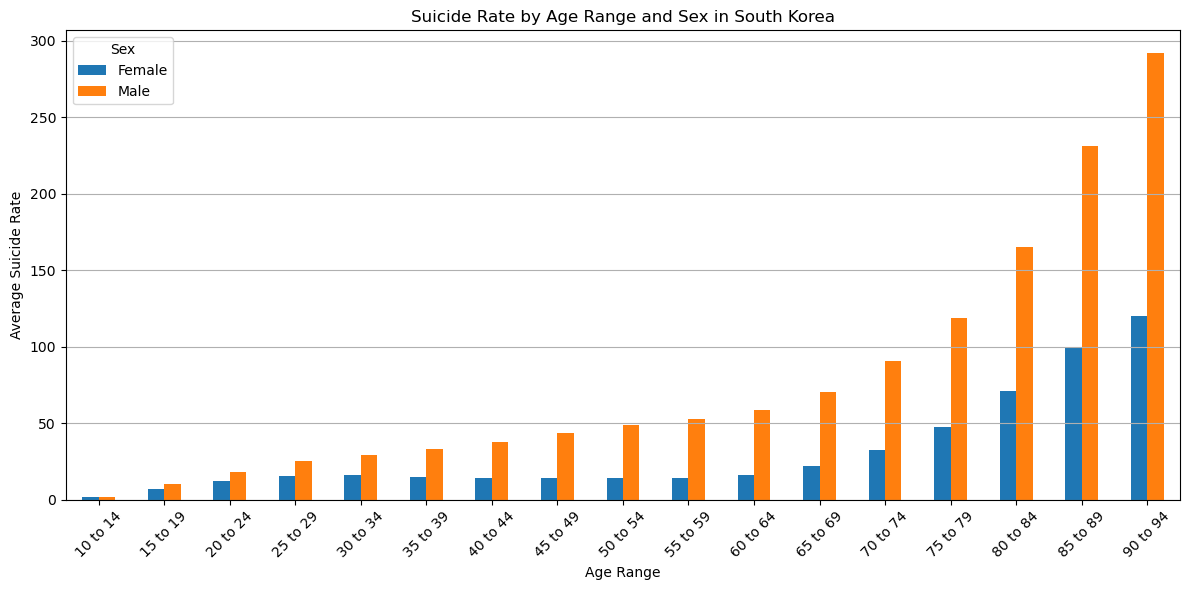


Average suicide rate by Age Range and Sex for China:
Sex           Female        Male
Age.Range                       
10 to 14    2.311001    2.474497
15 to 19    6.407423    5.461422
20 to 24   12.217665   10.695061
25 to 29   15.683906   14.027710
30 to 34   15.853485   14.021662
35 to 39   12.106236   13.002653
40 to 44   12.312355   14.100179
45 to 49   13.990967   15.140077
50 to 54   14.939454   16.163280
55 to 59   14.869531   17.751511
60 to 64   18.634971   24.257129
65 to 69   24.460208   31.160081
70 to 74   38.228037   47.772113
75 to 79   50.122612   61.600836
80 to 84   72.572890   90.446126
85 to 89   83.847972  113.477222
90 to 94   87.862656  119.334803


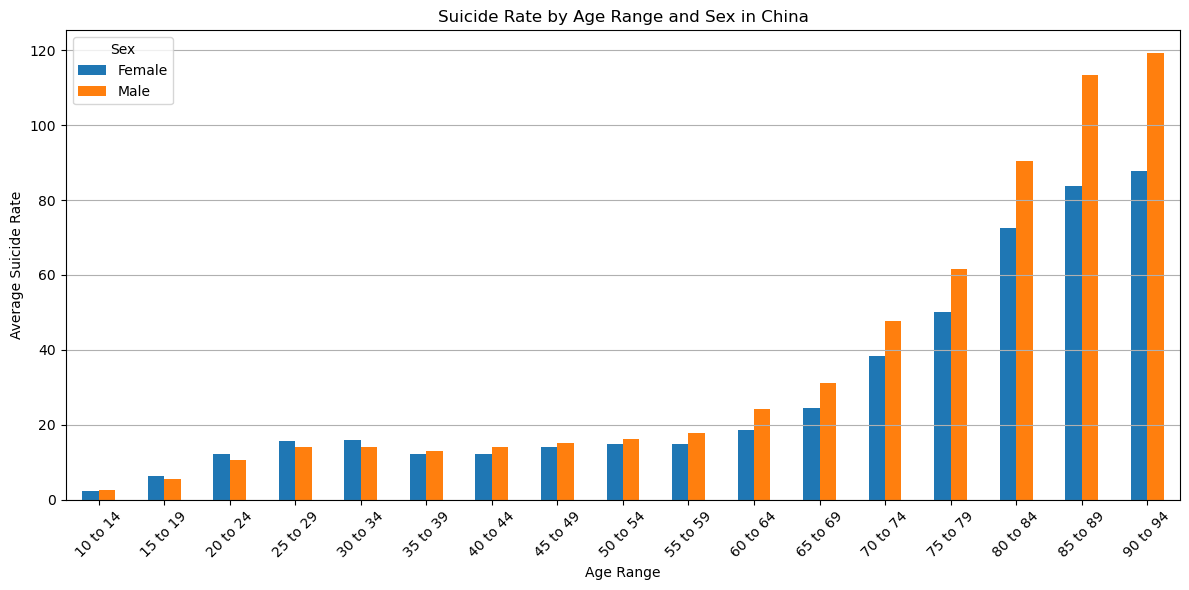


Average suicide rate by Age Range and Sex for Japan:
Sex           Female       Male
Age.Range                      
10 to 14    0.605688   1.209422
15 to 19    4.607036   8.838416
20 to 24   10.284980  23.326275
25 to 29   11.801073  26.758948
30 to 34   11.955313  28.345617
35 to 39   11.671407  32.003534
40 to 44   12.173391  37.484938
45 to 49   13.779273  45.855127
50 to 54   16.426448  53.141503
55 to 59   17.010007  56.488308
60 to 64   17.763252  49.436188
65 to 69   19.394650  43.485748
70 to 74   22.040310  42.146871
75 to 79   25.830664  45.959954
80 to 84   32.381059  57.724781
85 to 89   40.330582  77.766293
90 to 94   44.351050  98.461478


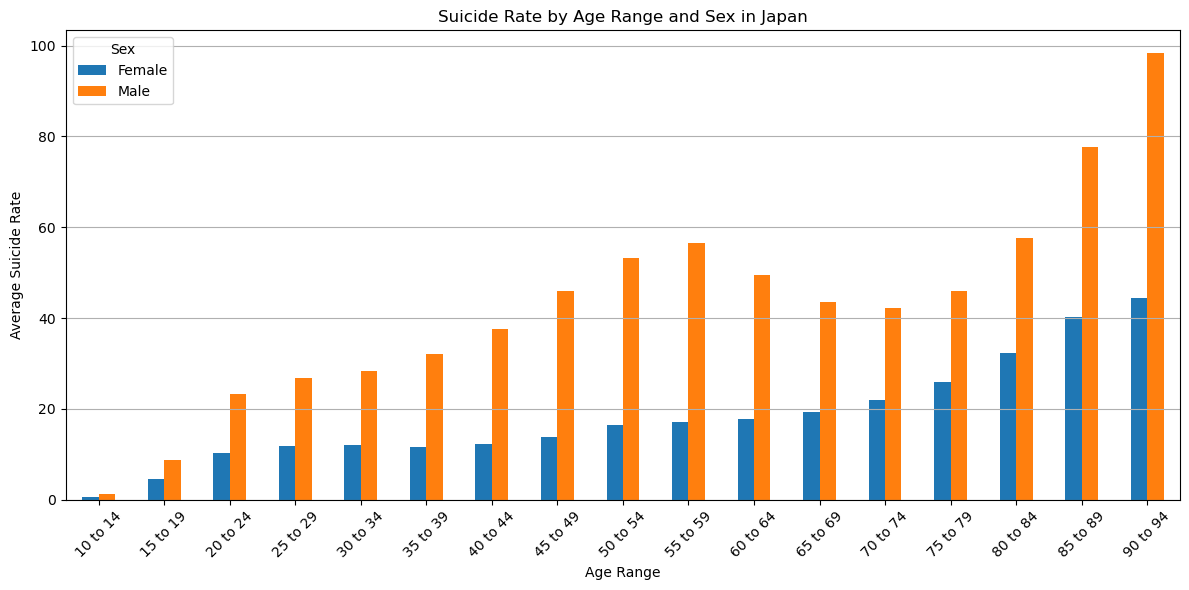


Average suicide rate by Age Range and Sex for Guam:
Sex           Female        Male
Age.Range                       
10 to 14    2.361829    3.652441
15 to 19    9.297020   43.566626
20 to 24    9.077173   54.406357
25 to 29   11.382251   52.916378
30 to 34    5.344493   44.143348
35 to 39    6.766361   36.732193
40 to 44    6.092236   34.402504
45 to 49    5.494015   28.321308
50 to 54    7.678881   26.562985
55 to 59    7.538021   32.749396
60 to 64   12.987294   29.506890
65 to 69    9.195189   36.986370
70 to 74   10.848371   33.086149
75 to 79   15.160343   40.068203
80 to 84   18.260722   70.949584
85 to 89   21.894529   93.428694
90 to 94   74.702896  144.863140


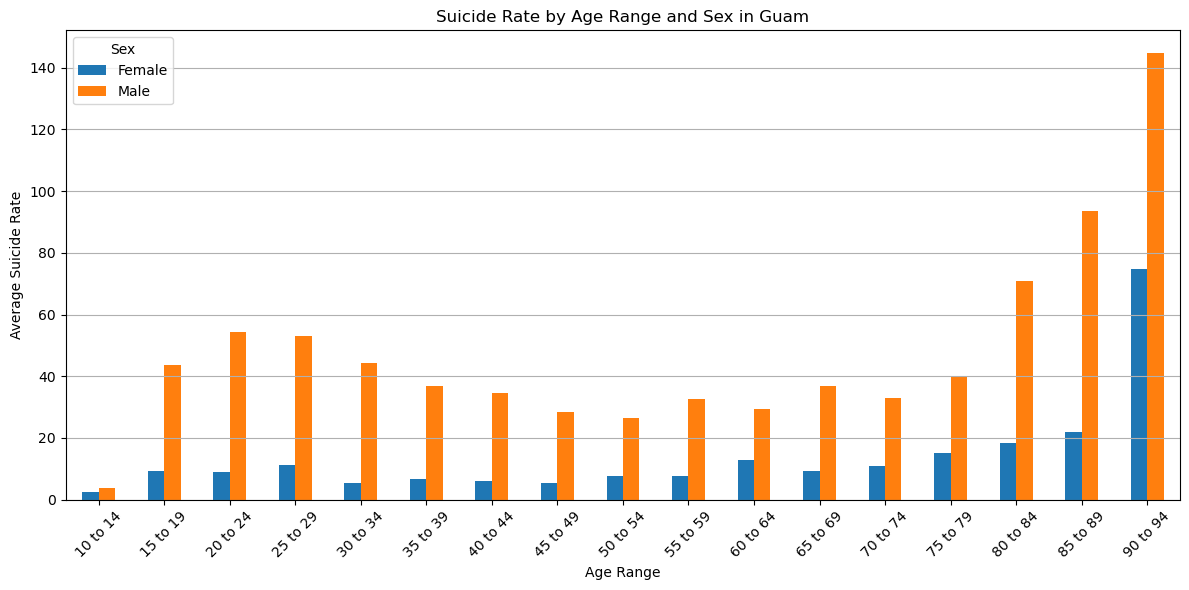


Average suicide rate by Age Range and Sex for Papua New Guinea:
Sex           Female       Male
Age.Range                      
10 to 14    3.565516   5.805783
15 to 19   23.878818  43.539796
20 to 24   21.390601  81.051092
25 to 29   24.399140  73.937106
30 to 34   16.302939  70.116545
35 to 39   14.727876  63.199537
40 to 44   14.355270  51.867841
45 to 49    9.351564  37.999930
50 to 54   11.796831  31.528020
55 to 59   10.533659  33.734373
60 to 64   14.382897  29.185018
65 to 69   10.778902  34.622864
70 to 74   12.543046  25.482531
75 to 79   15.293881  26.890445
80 to 84   13.662987  39.913142
85 to 89   14.627286  42.888218
90 to 94   46.255233  50.582117


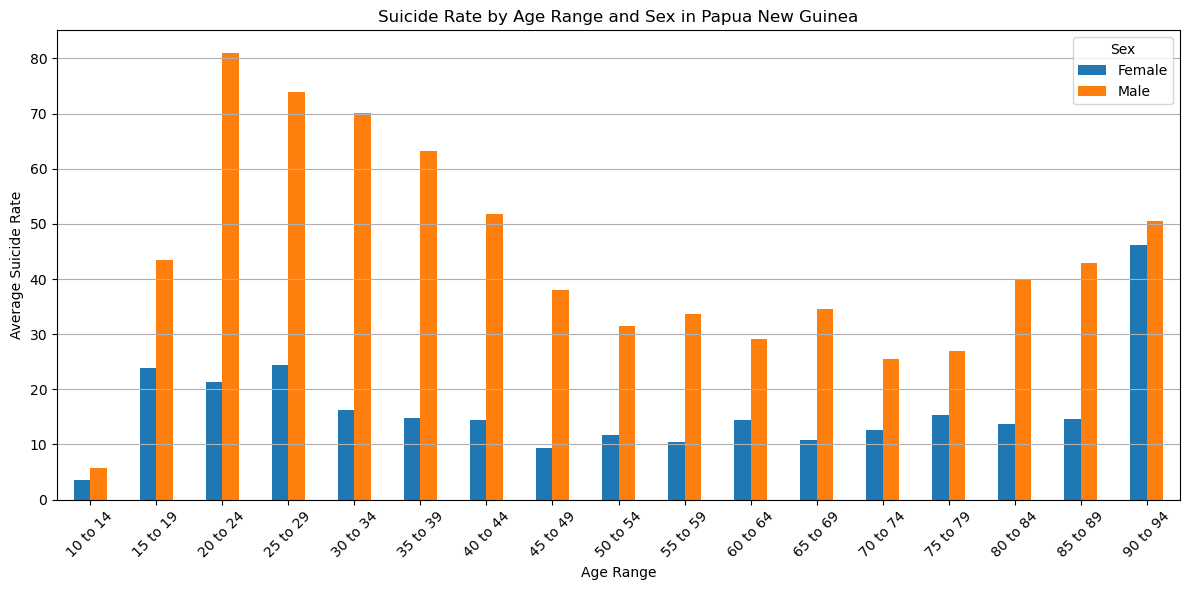

In [2]:
# Load data  
file_path = 'East_Asia_and_Pacific_Data.csv'  # Confirm the file path  
data = pd.read_csv(file_path)  

# Check unique values in 'Sex' and 'Age.Range' columns  
print("Unique values in 'Sex' column:", data['Sex'].unique())  
print("Unique Age Ranges:", sorted(data['Age.Range'].unique()))  

# 1. Get top 5 countries by average suicide rate  
top5_countries = data.groupby('Country')['Rate'].mean().sort_values(ascending=False).head(5).index.tolist()  
print("Top 5 countries by average suicide rate:", top5_countries)  

# 2. For each top country, aggregate average suicide rate by Age Range and Sex, then plot comparison  
for country in top5_countries:  
    country_data = data[data['Country'] == country]  

    # Group by Age Range and Sex, calculate mean suicide rate  
    agg = country_data.groupby(['Age.Range', 'Sex'])['Rate'].mean().unstack()  

    print(f"\nAverage suicide rate by Age Range and Sex for {country}:")  
    print(agg)  

    # Plot the aggregated data  
    agg.plot(kind='bar', figsize=(12, 6))  

    plt.title(f'Suicide Rate by Age Range and Sex in {country}')  
    plt.xlabel('Age Range')  
    plt.ylabel('Average Suicide Rate')  
    plt.xticks(rotation=45)  
    plt.grid(axis='y')  
    plt.tight_layout()  
    plt.show()  

Top 3 countries: ['South Korea', 'China', 'Japan']


C:\Users\20181\AppData\Local\Temp\ipykernel_13496\4123759250.py:74: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg_data = agg_data.groupby(['Country', 'Age.Range.10', 'Sex']).apply(safe_standardize).reset_index(drop=True)


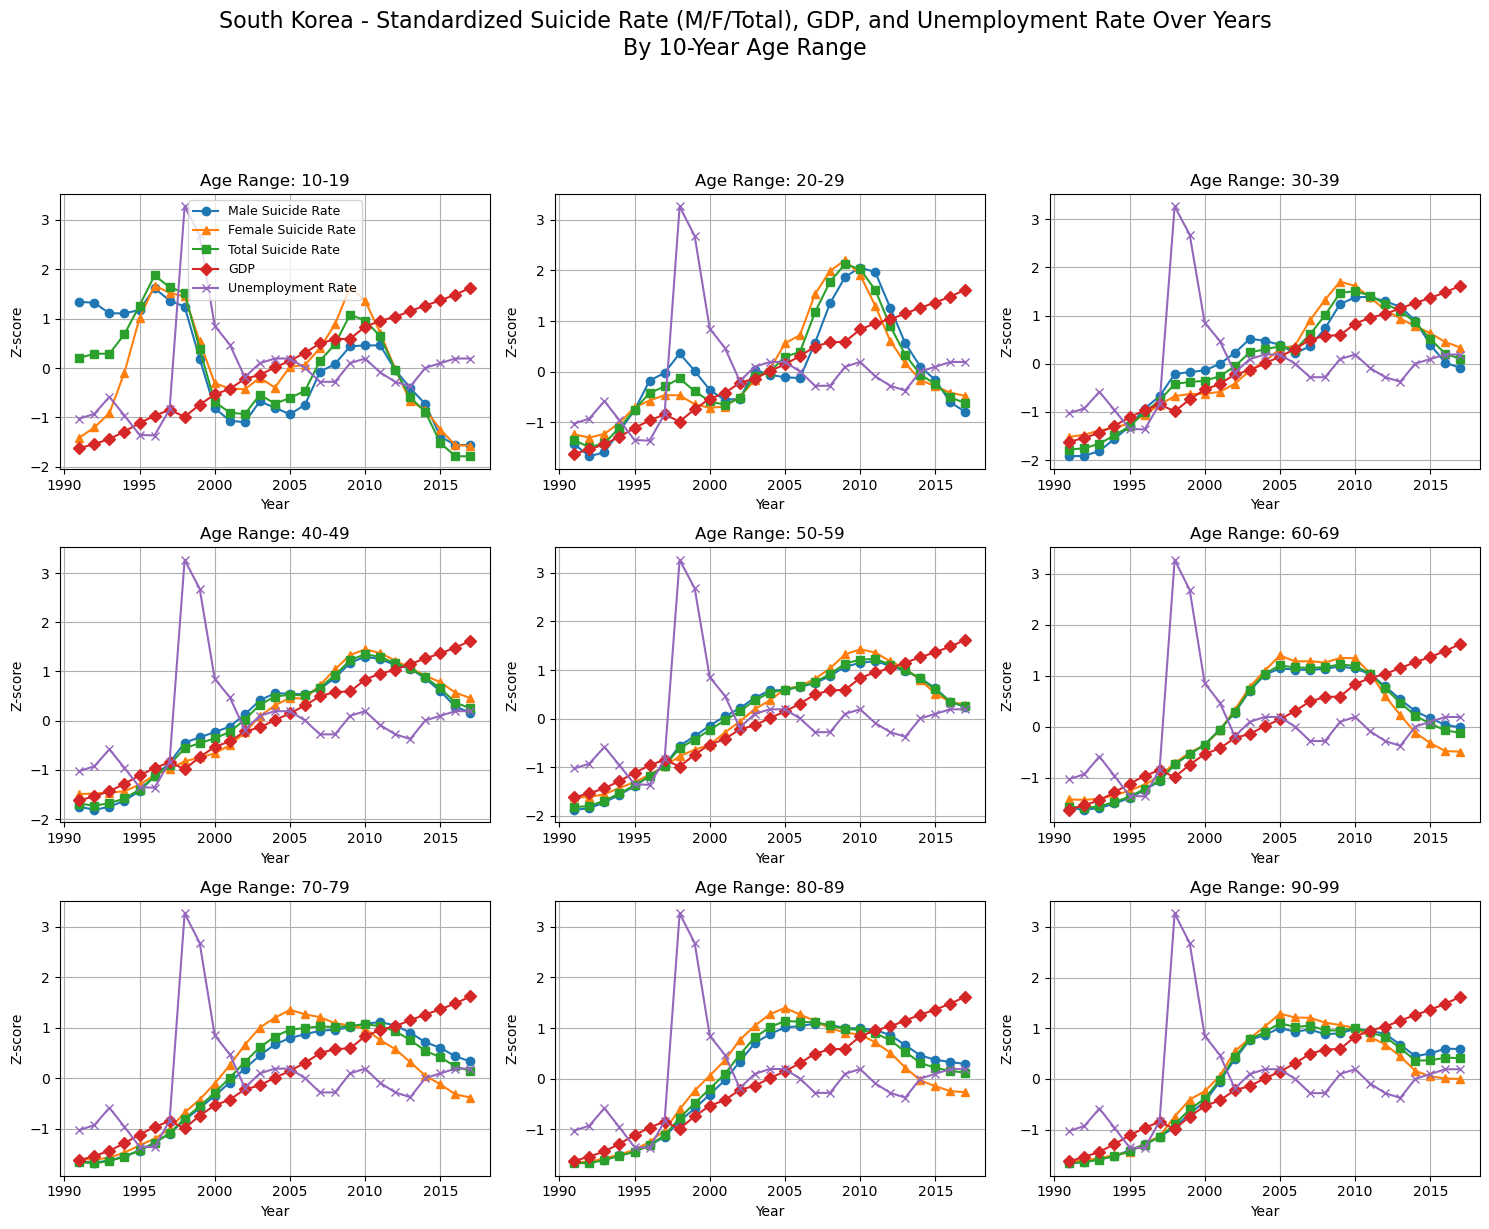

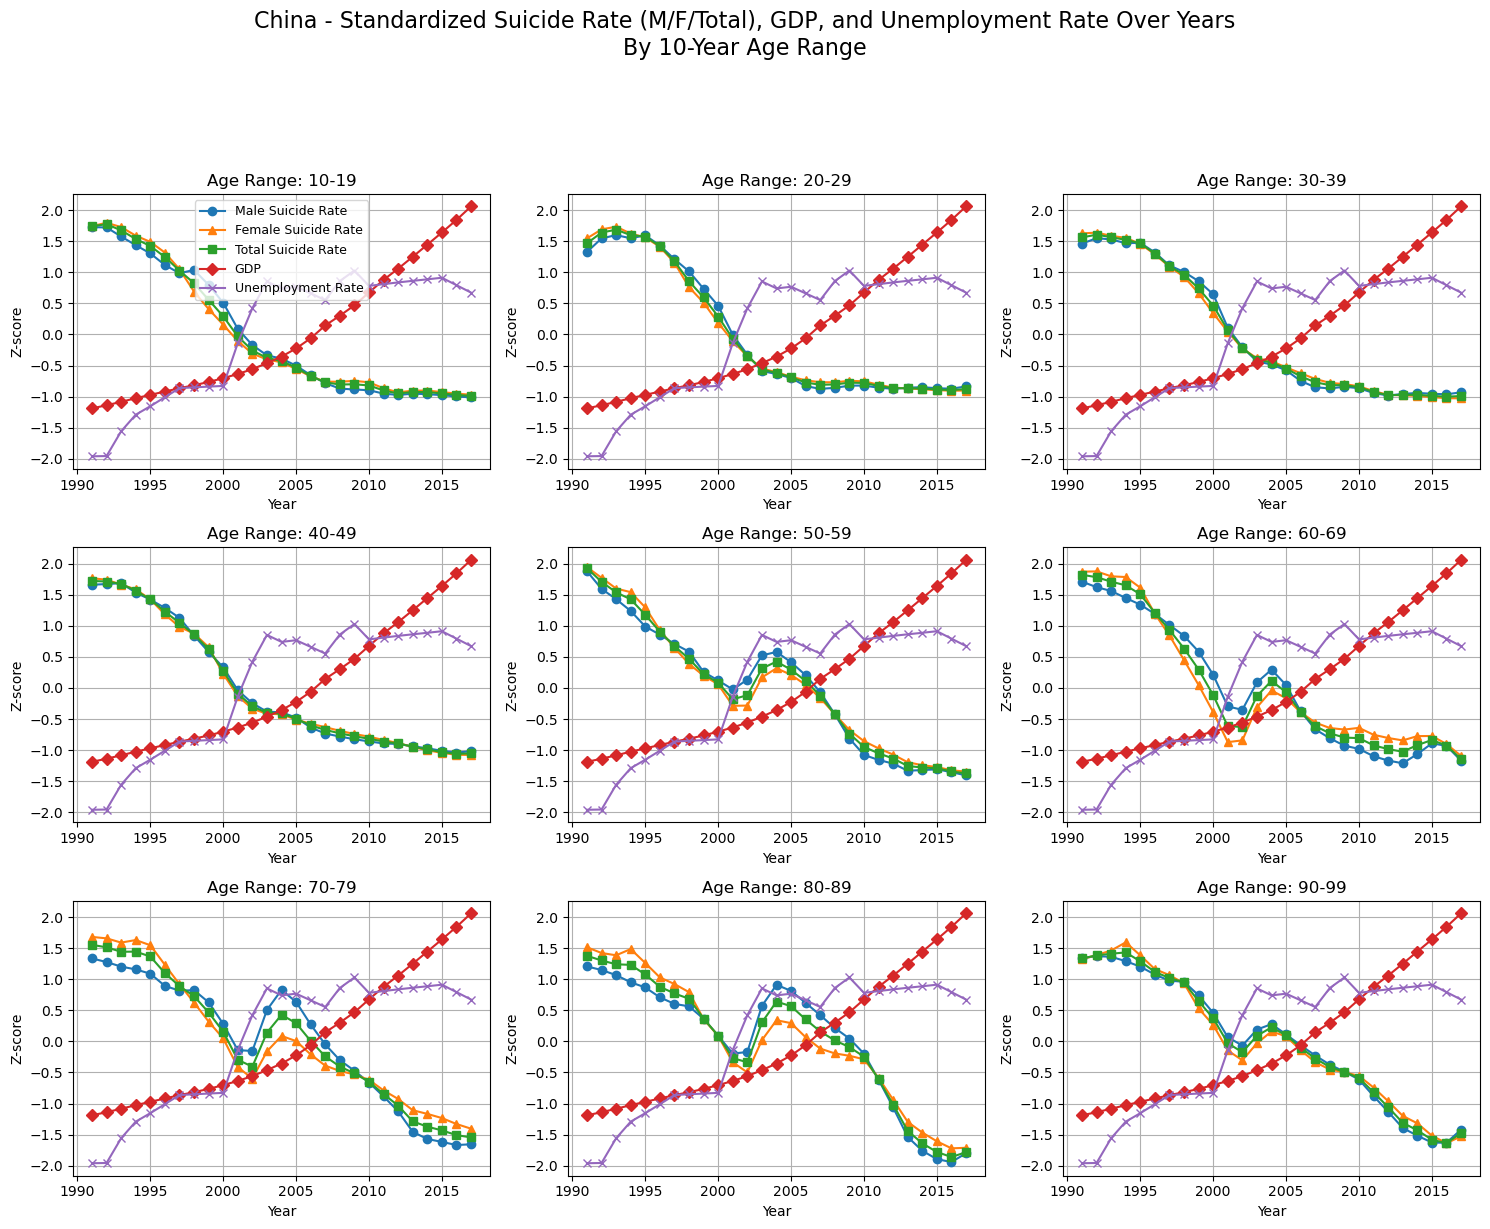

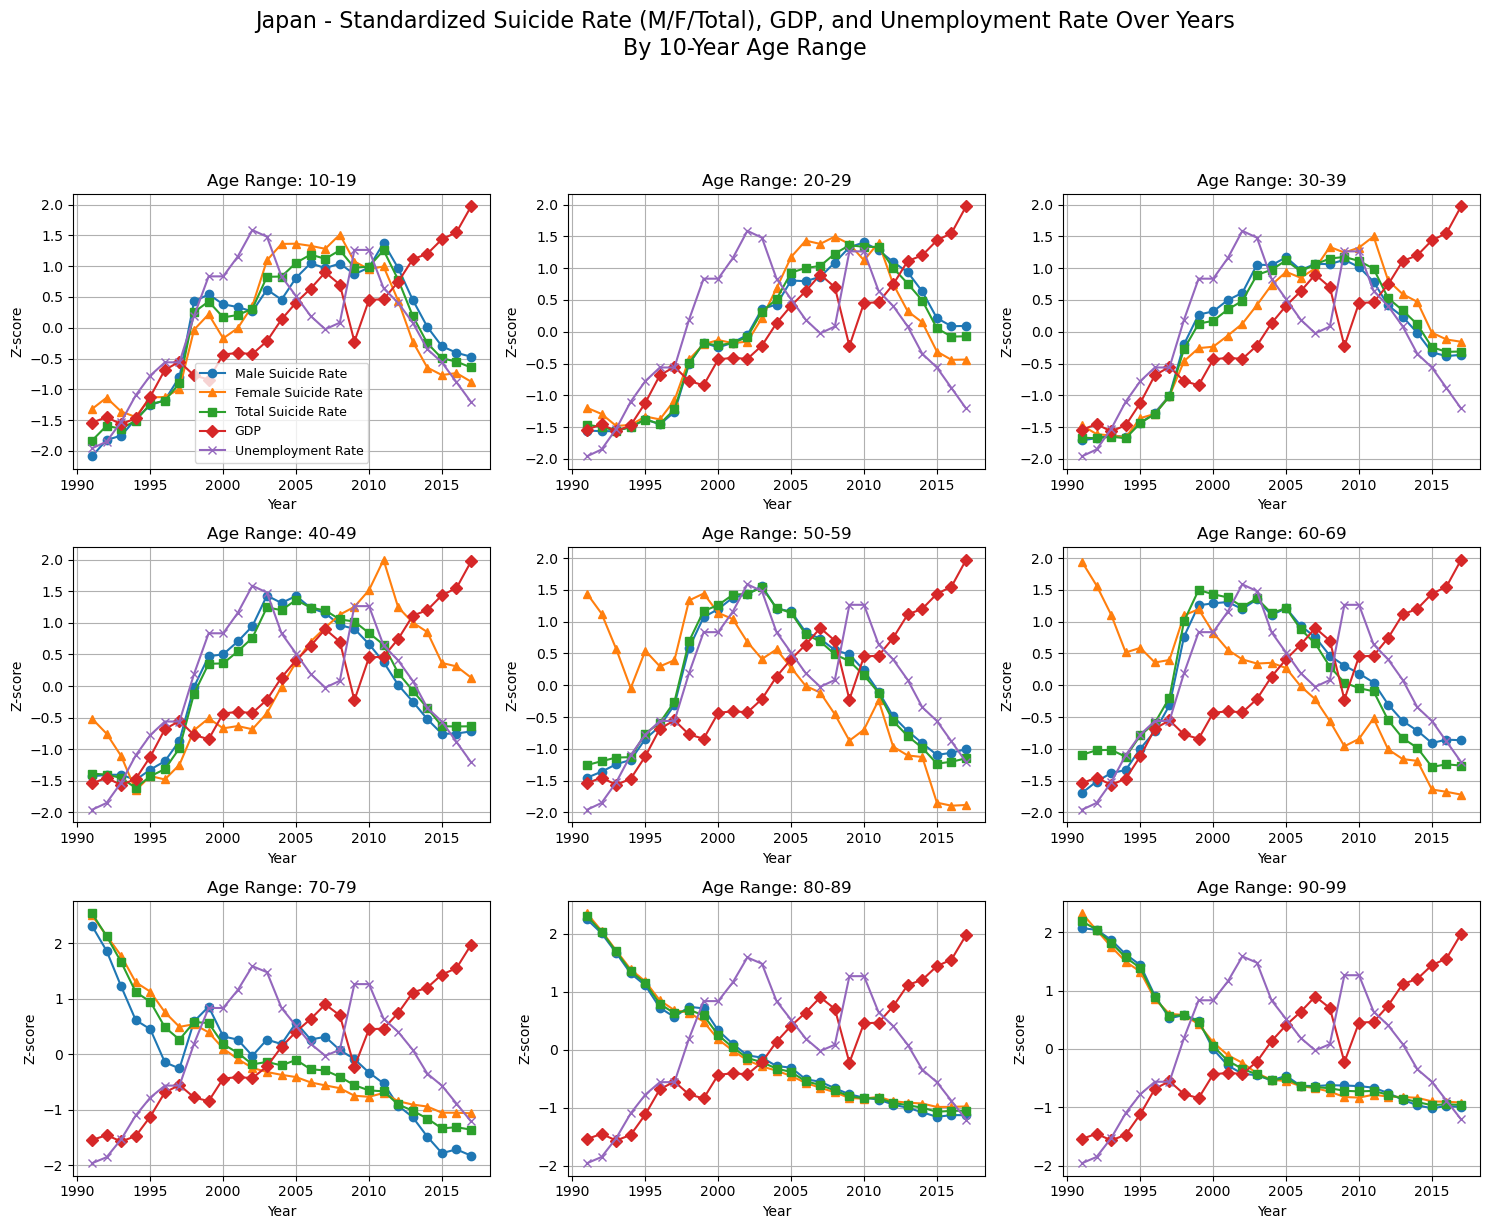

In [5]:
# Load data  
file_path = 'East_Asia_and_Pacific_Data.csv'  
data = pd.read_csv(file_path)  

# Get top 3 countries by average suicide rate  
top3_countries = data.groupby('Country')['Rate'].mean().sort_values(ascending=False).head(3).index.tolist()  
print("Top 3 countries:", top3_countries)  

data = data[data['Country'].isin(top3_countries)]  
data = data[data['Rate'] >= 0]  

data['GDP_ProCap_USD2010'] = data.groupby('Country')['GDP_ProCap_USD2010'].transform(lambda x: x.fillna(x.median()))  
data['UnemploymentRate'] = data.groupby('Country')['UnemploymentRate'].transform(lambda x: x.fillna(x.median()))  
data = data.dropna(subset=['Rate', 'GDP_ProCap_USD2010', 'UnemploymentRate', 'Age.Range', 'Sex'])  

# Redefine age range bins with 10-year intervals  
def map_age_range(age_str):  
    # Extract the starting age from string  
    match = re.match(r'(\d+)', age_str)  
    if not match:  
        return "Unknown"  
    age_start = int(match.group(1))  
    age_bin_start = (age_start // 10) * 10  
    age_bin_end = age_bin_start + 9  
    return f"{age_bin_start}-{age_bin_end}"  

data['Age.Range.10'] = data['Age.Range'].apply(map_age_range)  

# Aggregate averages by Country, Year, 10-year Age Range, and Sex  
agg_data = data.groupby(['Country', 'Year', 'Age.Range.10', 'Sex']).agg({  
    'Rate': 'mean',  
    'GDP_ProCap_USD2010': 'mean',  
    'UnemploymentRate': 'mean'  
}).reset_index()  

# Calculate totals (combined sexes) suicide rate and medians of GDP, unemployment  
total_data = data.groupby(['Country', 'Year', 'Age.Range.10']).agg({  
    'Rate': 'mean',  
    'GDP_ProCap_USD2010': 'median',  
    'UnemploymentRate': 'median'  
}).reset_index()  
total_data['Sex'] = 'Total'  

agg_data = pd.concat([agg_data, total_data], ignore_index=True, sort=False)  

def safe_standardize(df):  
    df_valid = df.dropna(subset=['Rate', 'GDP_ProCap_USD2010', 'UnemploymentRate'])  
    if len(df_valid) < 2:  
        df['Rate_z'] = np.nan  
        df['GDP_z'] = np.nan  
        df['Unemp_z'] = np.nan  
        return df  

    var_check = df_valid[['Rate', 'GDP_ProCap_USD2010', 'UnemploymentRate']].var()  
    if (var_check == 0).any():  
        df['Rate_z'] = np.nan  
        df['GDP_z'] = np.nan  
        df['Unemp_z'] = np.nan  
        return df  

    scaler = StandardScaler()  
    try:  
        scaled = scaler.fit_transform(df_valid[['Rate', 'GDP_ProCap_USD2010', 'UnemploymentRate']])  
        df.loc[df_valid.index, ['Rate_z', 'GDP_z', 'Unemp_z']] = scaled  
        df.loc[~df.index.isin(df_valid.index), ['Rate_z', 'GDP_z', 'Unemp_z']] = np.nan  
    except Exception:  
        df['Rate_z'] = np.nan  
        df['GDP_z'] = np.nan  
        df['Unemp_z'] = np.nan  
    return df  

with warnings.catch_warnings():  
    warnings.simplefilter("ignore", RuntimeWarning)  
    agg_data = agg_data.groupby(['Country', 'Age.Range.10', 'Sex']).apply(safe_standardize).reset_index(drop=True)  

for country in top3_countries:  
    country_df = agg_data[agg_data['Country'] == country]  
    age_groups = sorted(country_df['Age.Range.10'].unique(), key=lambda x: int(x.split('-')[0]))  
    n_age = len(age_groups)  
    
    ncols = 3  
    nrows = (n_age + ncols - 1) // ncols  
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows), squeeze=False)  
    fig.suptitle(f"{country} - Standardized Suicide Rate (M/F/Total), GDP, and Unemployment Rate Over Years\nBy 10-Year Age Range", fontsize=16, y=1.02)  

    for idx, age in enumerate(age_groups):  
        ax = axes[idx // ncols][idx % ncols]  
        age_df = country_df[country_df['Age.Range.10'] == age]  

        male_df = age_df[age_df['Sex'] == 'Male']  
        female_df = age_df[age_df['Sex'] == 'Female']  
        total_df = age_df[age_df['Sex'] == 'Total']  
        gdp_df = age_df.drop_duplicates(subset='Year').sort_values('Year')  

        ax.plot(male_df['Year'], male_df['Rate_z'], label='Male Suicide Rate', marker='o')  
        ax.plot(female_df['Year'], female_df['Rate_z'], label='Female Suicide Rate', marker='^')  
        ax.plot(total_df['Year'], total_df['Rate_z'], label='Total Suicide Rate', marker='s')  
        ax.plot(gdp_df['Year'], gdp_df['GDP_z'], label='GDP', marker='D')  
        ax.plot(gdp_df['Year'], gdp_df['Unemp_z'], label='Unemployment Rate', marker='x')  

        ax.set_title(f'Age Range: {age}')  
        ax.set_xlabel('Year')  
        ax.set_ylabel('Z-score')  
        ax.grid(True)  
        if idx == 0:  
            ax.legend(fontsize=9)  

    for j in range(idx + 1, nrows * ncols):  
        fig.delaxes(axes[j // ncols][j % ncols])  

    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.show()  

for country in top3_countries:  
    country_df = agg_data[agg_data['Country'] == country]  
    age_groups = sorted(country_df['Age.Range.10'].unique(), key=lambda x: int(x.split('-')[0]))  
    n_age = len(age_groups)  
      
    ncols = 3  
    nrows = (n_age + ncols - 1) // ncols  
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows), squeeze=False)  
    fig.suptitle(f"{country} - Standardized Suicide Rate (M/F/Total), GDP, and Unemployment Rate Over Years\nBy 10-Year Age Range", fontsize=16, y=0.98)  
    
    for idx, age in enumerate(age_groups):  
        ax = axes[idx // ncols][idx % ncols]  
        age_df = country_df[country_df['Age.Range.10'] == age]  
    
        male_df = age_df[age_df['Sex'] == 'Male']  
        female_df = age_df[age_df['Sex'] == 'Female']  
        total_df = age_df[age_df['Sex'] == 'Total']  
        gdp_df = age_df.drop_duplicates(subset='Year').sort_values('Year')  
    
        ax.plot(male_df['Year'], male_df['Rate_z'], label='Male Suicide Rate', marker='o')  
        ax.plot(female_df['Year'], female_df['Rate_z'], label='Female Suicide Rate', marker='^')  
        ax.plot(total_df['Year'], total_df['Rate_z'], label='Total Suicide Rate', marker='s')  
        ax.plot(gdp_df['Year'], gdp_df['GDP_z'], label='GDP', marker='D')  
        ax.plot(gdp_df['Year'], gdp_df['Unemp_z'], label='Unemployment Rate', marker='x')  
    
        ax.set_title(f'Age Range: {age}')  
        ax.set_xlabel('Year')  
        ax.set_ylabel('Z-score')  
        ax.grid(True)  
        if idx == 0:  
            ax.legend(fontsize=9)  
    
    for j in range(idx + 1, nrows * ncols):  
        fig.delaxes(axes[j // ncols][j % ncols])  
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    
    # Save image to current directory, named by country  
    fig.savefig(f"{country}_suicide_gdp_unemp.png", bbox_inches='tight')  
    plt.close(fig)  # Close figure to save memory  

Time Series Analysis for South Korea | Sex: Total | Age Range: 30-39
ADF Stationarity Test:
ADF test: Rate_z | p-value=0.1638
ADF test: GDP_z | p-value=0.9132
ADF test: Unemp_z | p-value=0.0004

Lag order selection (AIC): 5

VAR Model Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 19, Apr, 2025
Time:                     17:00:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -7.56782
Nobs:                     21.0000    HQIC:                  -9.43716
Log likelihood:           63.1375    FPE:                0.000198983
AIC:                     -9.95530    Det(Omega_mle):     3.63806e-05
--------------------------------------------------------------------
Results for equation Rate_z_diff
                     coefficient       std. error           t-stat            prob
---------------------------------------------------

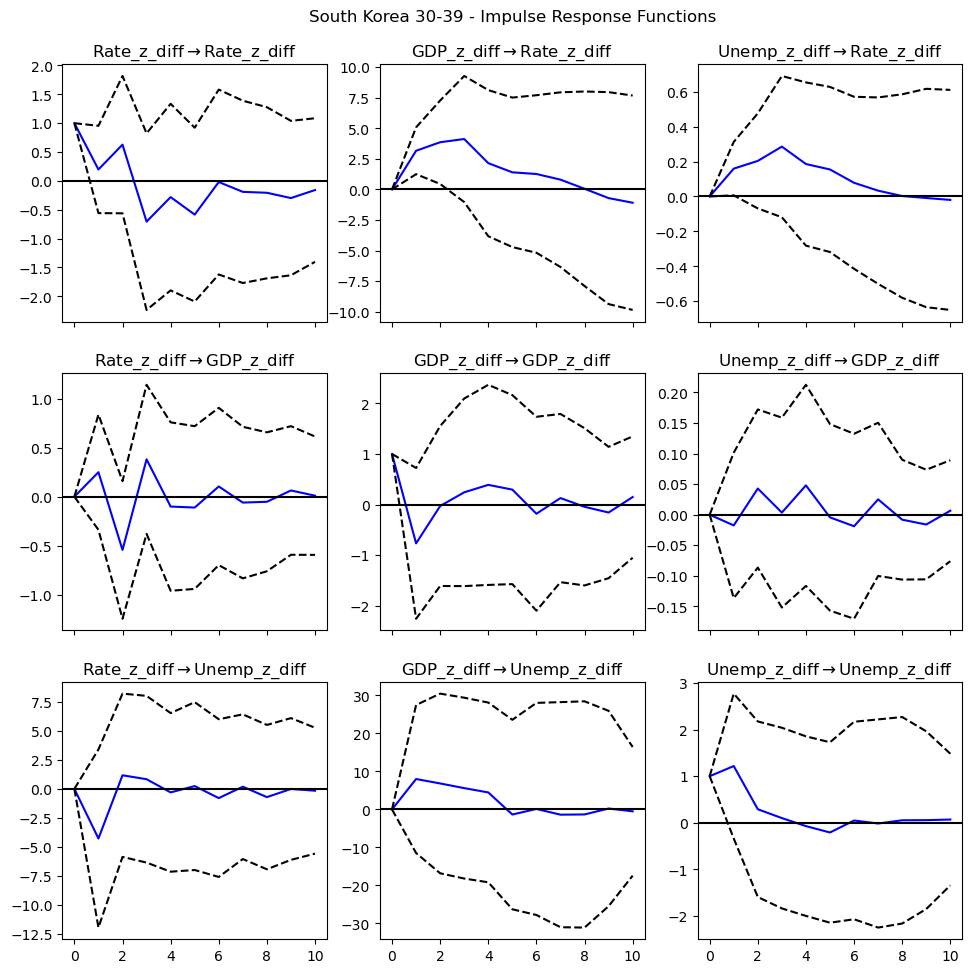

In [7]:


warnings.simplefilter("ignore")  

country = top3_countries[0]  

sex = "Total"  
age_range = "30-39"  
title = f"Time Series Analysis for {country} | Sex: {sex} | Age Range: {age_range}"  
print(title)  
df_ts = agg_data[(agg_data['Country'] == country) &  
                 (agg_data['Sex'] == sex) &  
                 (agg_data['Age.Range.10'] == age_range)].copy()  

df_ts = df_ts.sort_values('Year').set_index('Year')  

series_data = df_ts[['Rate_z', 'GDP_z', 'Unemp_z']].dropna()  

def adf_test(series, name):  
    result = adfuller(series)  
    print(f"ADF test: {name} | p-value={result[1]:.4f}")  
    return result[1]  

print("ADF Stationarity Test:")  
adf_pvalues = {}  
for col in ['Rate_z', 'GDP_z', 'Unemp_z']:  
    adf_pvalues[col] = adf_test(series_data[col], col)  

for col, pval in adf_pvalues.items():  
    if pval > 0.05:  
        series_data[col + '_diff'] = series_data[col].diff()  
    else:  
        series_data[col + '_diff'] = series_data[col]  

series_diff = series_data.dropna().copy()  

model = VAR(series_diff[[c + '_diff' for c in ['Rate_z', 'GDP_z', 'Unemp_z']]])  
lag_selection = model.select_order(maxlags=5)  
print("\nLag order selection (AIC):", lag_selection.aic)  

lag_order = lag_selection.aic if lag_selection.aic is not None else 1  

var_model = model.fit(lag_order)  
print("\nVAR Model Summary:")  
print(var_model.summary())  

print("\nGranger Causality Test Results:")  
print("\nGDP causing Suicide Rate:")  
grangercausalitytests(series_diff[['Rate_z_diff', 'GDP_z_diff']], maxlag=lag_order, verbose=True)  

print("\nUnemployment causing Suicide Rate:")  
grangercausalitytests(series_diff[['Rate_z_diff', 'Unemp_z_diff']], maxlag=lag_order, verbose=True)  

irf = var_model.irf(10)  
irf.plot(orth=False)  
plt.suptitle(f"{country} {age_range} - Impulse Response Functions")  
plt.show()  

Time Series Analysis for China | Sex: Total | Age Range: 40-49
ADF Stationarity Test:
ADF test: Rate_z | p-value=0.0001
ADF test: GDP_z | p-value=0.9943
ADF test: Unemp_z | p-value=0.1404

Lag order selection (AIC): 5

VAR Model Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 19, Apr, 2025
Time:                     17:01:06
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -19.2430
Nobs:                     21.0000    HQIC:                  -21.1123
Log likelihood:           185.726    FPE:                1.69189e-09
AIC:                     -21.6304    Det(Omega_mle):     3.09331e-10
--------------------------------------------------------------------
Results for equation Rate_z_diff
                     coefficient       std. error           t-stat            prob
---------------------------------------------------------

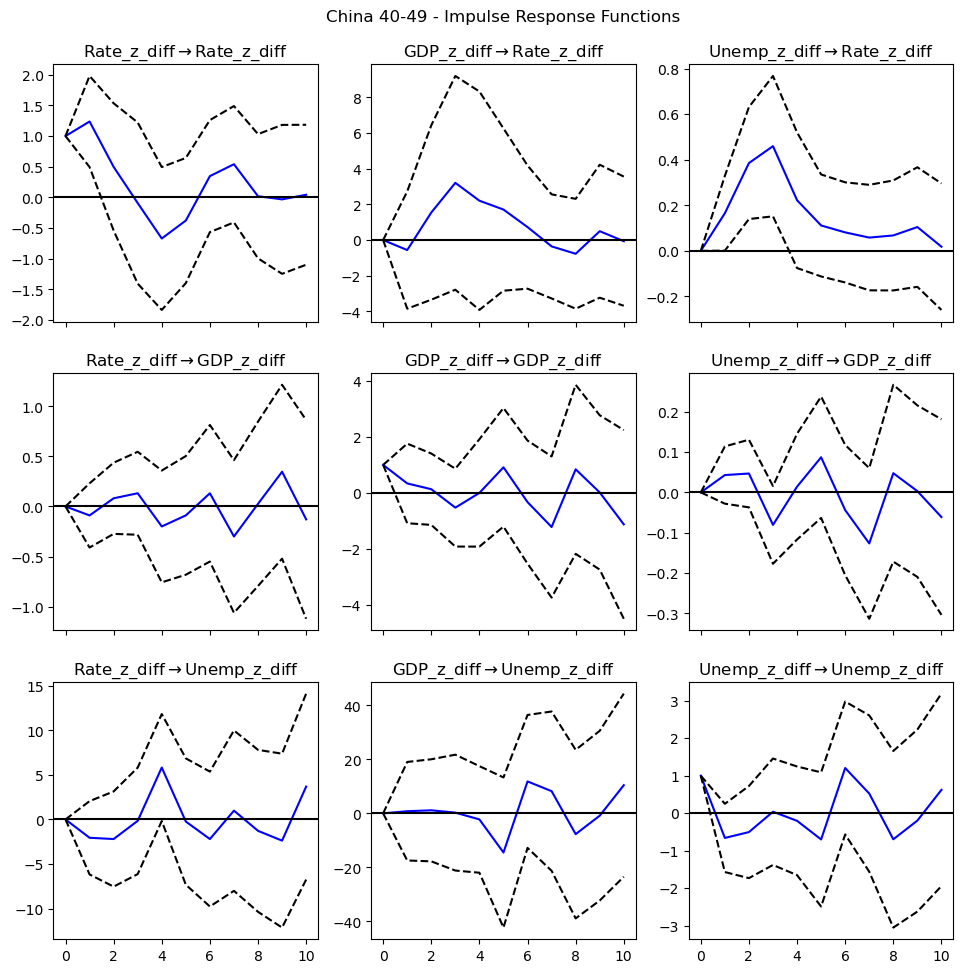

In [8]:

warnings.simplefilter("ignore")  

country = top3_countries[1]  

sex = "Total"  
age_range = "40-49"  
title = f"Time Series Analysis for {country} | Sex: {sex} | Age Range: {age_range}"  
print(title)  
df_ts = agg_data[(agg_data['Country'] == country) &  
                 (agg_data['Sex'] == sex) &  
                 (agg_data['Age.Range.10'] == age_range)].copy()  

df_ts = df_ts.sort_values('Year').set_index('Year')  

series_data = df_ts[['Rate_z', 'GDP_z', 'Unemp_z']].dropna()  

def adf_test(series, name):  
    result = adfuller(series)  
    print(f"ADF test: {name} | p-value={result[1]:.4f}")  
    return result[1]  

print("ADF Stationarity Test:")  
adf_pvalues = {}  
for col in ['Rate_z', 'GDP_z', 'Unemp_z']:  
    adf_pvalues[col] = adf_test(series_data[col], col)  

for col, pval in adf_pvalues.items():  
    if pval > 0.05:  
        series_data[col + '_diff'] = series_data[col].diff()  
    else:  
        series_data[col + '_diff'] = series_data[col]  

series_diff = series_data.dropna().copy()  

model = VAR(series_diff[[c + '_diff' for c in ['Rate_z', 'GDP_z', 'Unemp_z']]])  
lag_selection = model.select_order(maxlags=5)  
print("\nLag order selection (AIC):", lag_selection.aic)  

lag_order = lag_selection.aic if lag_selection.aic is not None else 1  

var_model = model.fit(lag_order)  
print("\nVAR Model Summary:")  
print(var_model.summary())  

print("\nGranger Causality Test Results:")  
print("\nGDP causing Suicide Rate:")  
grangercausalitytests(series_diff[['Rate_z_diff', 'GDP_z_diff']], maxlag=lag_order, verbose=True)  

print("\nUnemployment causing Suicide Rate:")  
grangercausalitytests(series_diff[['Rate_z_diff', 'Unemp_z_diff']], maxlag=lag_order, verbose=True)  

irf = var_model.irf(10)  
irf.plot(orth=False)  
plt.suptitle(f"{country} {age_range} - Impulse Response Functions")  
plt.show()  

Time Series Analysis for Japan | Sex: Total | Age Range: 40-49
ADF Stationarity Test:
ADF test: Rate_z | p-value=0.0169
ADF test: GDP_z | p-value=0.6258
ADF test: Unemp_z | p-value=0.2176

Lag order selection (AIC): 5

VAR Model Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 19, Apr, 2025
Time:                     17:01:20
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -6.85229
Nobs:                     21.0000    HQIC:                  -8.72163
Log likelihood:           55.6245    FPE:                0.000406973
AIC:                     -9.23977    Det(Omega_mle):     7.44078e-05
--------------------------------------------------------------------
Results for equation Rate_z_diff
                     coefficient       std. error           t-stat            prob
---------------------------------------------------------

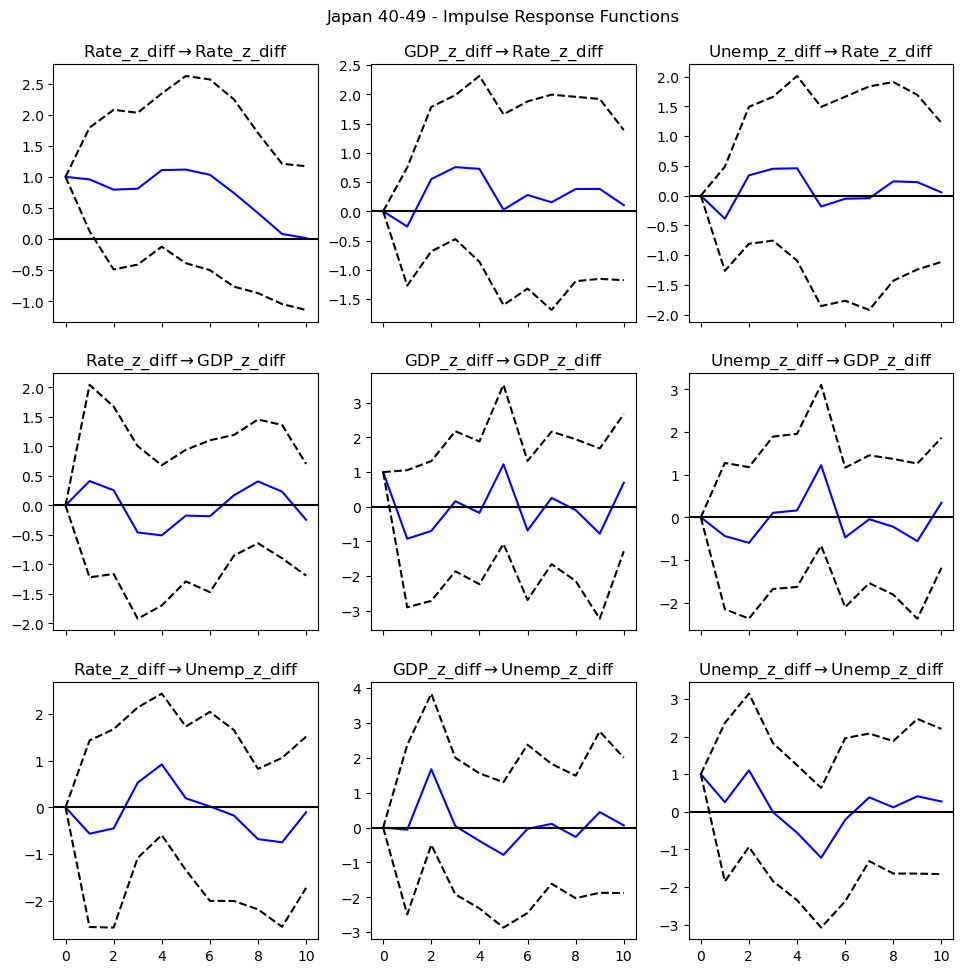

In [9]:
warnings.simplefilter("ignore")  

country = top3_countries[2]  

sex = "Total"  
age_range = "40-49"  
title = f"Time Series Analysis for {country} | Sex: {sex} | Age Range: {age_range}"  
print(title)  
df_ts = agg_data[(agg_data['Country'] == country) &  
                 (agg_data['Sex'] == sex) &  
                 (agg_data['Age.Range.10'] == age_range)].copy()  

df_ts = df_ts.sort_values('Year').set_index('Year')  

series_data = df_ts[['Rate_z', 'GDP_z', 'Unemp_z']].dropna()  

def adf_test(series, name):  
    result = adfuller(series)  
    print(f"ADF test: {name} | p-value={result[1]:.4f}")  
    return result[1]  

print("ADF Stationarity Test:")  
adf_pvalues = {}  
for col in ['Rate_z', 'GDP_z', 'Unemp_z']:  
    adf_pvalues[col] = adf_test(series_data[col], col)  

for col, pval in adf_pvalues.items():  
    if pval > 0.05:  
        series_data[col + '_diff'] = series_data[col].diff()  
    else:  
        series_data[col + '_diff'] = series_data[col]  

series_diff = series_data.dropna().copy()  

model = VAR(series_diff[[c + '_diff' for c in ['Rate_z', 'GDP_z', 'Unemp_z']]])  
lag_selection = model.select_order(maxlags=5)  
print("\nLag order selection (AIC):", lag_selection.aic)  

lag_order = lag_selection.aic if lag_selection.aic is not None else 1  

var_model = model.fit(lag_order)  
print("\nVAR Model Summary:")  
print(var_model.summary())  

print("\nGranger Causality Test Results:")  
print("\nGDP causing Suicide Rate:")  
grangercausalitytests(series_diff[['Rate_z_diff', 'GDP_z_diff']], maxlag=lag_order, verbose=True)  

print("\nUnemployment causing Suicide Rate:")  
grangercausalitytests(series_diff[['Rate_z_diff', 'Unemp_z_diff']], maxlag=lag_order, verbose=True)  

irf = var_model.irf(10)  
irf.plot(orth=False)  
plt.suptitle(f"{country} {age_range} - Impulse Response Functions")  
plt.show()  

# Data Modeling

In [11]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.metrics import mean_squared_error  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import LSTM, Dense, Dropout  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.regularizers import l2  
from tensorflow.keras.callbacks import EarlyStopping  


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.7573 - val_loss: 1.7990
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5633 - val_loss: 1.6950
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4835 - val_loss: 1.5773
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3895 - val_loss: 1.4767
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3227 - val_loss: 1.3463
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2063 - val_loss: 1.2086
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2296 - val_loss: 1.0517
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2388 - val_loss: 0.8767
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1477 - val_loss: 0.7015
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1267 - val_loss: 0.5038
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0728 - val_loss: 0.3145
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0610 - val_loss: 0.1413


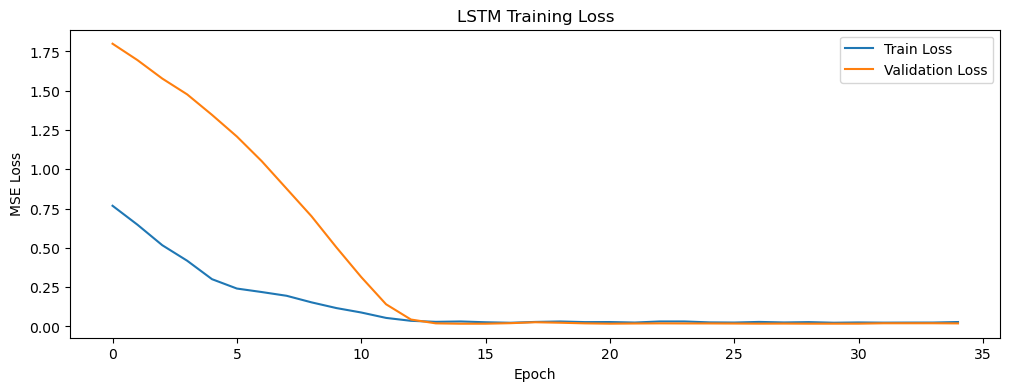

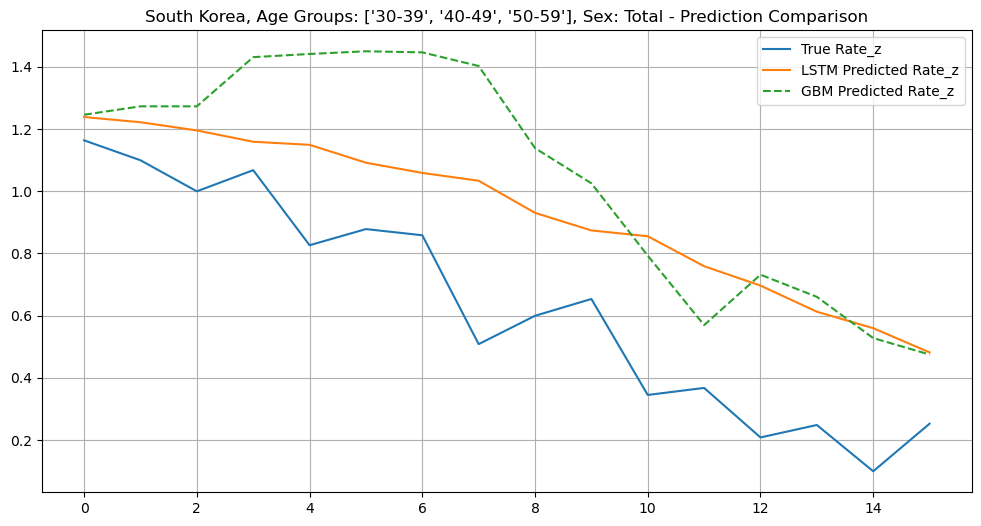

In [12]:
lags = 5  
country_sel = 'South Korea'  
sex_sel = 'Total'  
age_list = ['30-39', '40-49', '50-59']  

df_sub = agg_data[  
    (agg_data['Country'] == country_sel) &  
    (agg_data['Sex'] == sex_sel) &  
    (agg_data['Age.Range.10'].isin(age_list))  
].copy()  
df_sub = df_sub.sort_values('Year').reset_index(drop=True)  

target_col = 'Rate_z'  

def create_lag_features_original(df, lag_steps):  
    df_lagged = df.copy()  
    for lag in range(1, lag_steps + 1):  
        df_lagged[f'lag_{lag}'] = df_lagged[target_col].shift(lag)  
    df_lagged = df_lagged.dropna().reset_index(drop=True)  
    return df_lagged  

df_lagged = create_lag_features_original(df_sub, lags)  

feature_cols = [f'lag_{i}' for i in range(1, lags + 1)]  

X = df_lagged[feature_cols].values  
y = df_lagged[target_col].values    

if len(df_lagged) < 10:  
    print(f"Too few samples: {len(df_lagged)} records, not suitable for training.")  
else:  
    split_ratio = 0.8  
    split_idx = int(len(df_lagged) * split_ratio)  

    X_lstm = X.reshape((X.shape[0], lags, 1))  

    X_train, X_test = X_lstm[:split_idx], X_lstm[split_idx:]  
    y_train, y_test = y[:split_idx], y[split_idx:]  

    model = Sequential([  
        LSTM(64, return_sequences=True, input_shape=(lags,1)),  
        Dropout(0.1),  
        LSTM(32),  
        Dropout(0.1),  
        Dense(16, activation='relu'),  
        Dense(1)  
    ])  

    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0005))  
    model.summary()  

    early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  

    history = model.fit(  
        X_train, y_train,  
        epochs=200,  
        batch_size=8,  
        validation_split=0.1,  
        callbacks=[early_stop],  
        verbose=1  
    )  

    y_pred = model.predict(X_test).flatten()  
    mse = mean_squared_error(y_test, y_pred)  
    print(f"LSTM MSE on original target: {mse:.4f}")  

    gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.08, max_depth=3, random_state=42)  
    gbm.fit(X[:split_idx], y[:split_idx])  
    y_pred_gbm = gbm.predict(X[split_idx:])  
    mse_gbm = mean_squared_error(y[split_idx:], y_pred_gbm)  
    print(f"GBM MSE on original target: {mse_gbm:.4f}")  

    plt.figure(figsize=(12, 4))  
    plt.plot(history.history['loss'], label='Train Loss')  
    plt.plot(history.history['val_loss'], label='Validation Loss')  
    plt.title('LSTM Training Loss')  
    plt.xlabel('Epoch')  
    plt.ylabel('MSE Loss')  
    plt.legend()  
    plt.show()  

    plt.figure(figsize=(12, 6))  
    plt.plot(y_test, label='True Rate_z')  
    plt.plot(y_pred, label='LSTM Predicted Rate_z')  
    plt.plot(range(len(y_test)), y_pred_gbm, label='GBM Predicted Rate_z', linestyle='--')  
    plt.title(f'{country_sel}, Age Groups: {age_list}, Sex: {sex_sel} - Prediction Comparison')  
    plt.legend()  
    plt.grid(True)  
    plt.show()  

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.8588 - val_loss: 0.9476
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6666 - val_loss: 0.9344
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6433 - val_loss: 0.9152
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5386 - val_loss: 0.8991
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5355 - val_loss: 0.8839
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3881 - val_loss: 0.8574
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2718 - val_loss: 0.8269
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2206 - val_loss: 0.7781
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2355 - val_loss: 0.7243
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1919 - val_loss: 0.6672
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1441 - val_loss: 0.6107
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1521 - val_loss: 0.5466


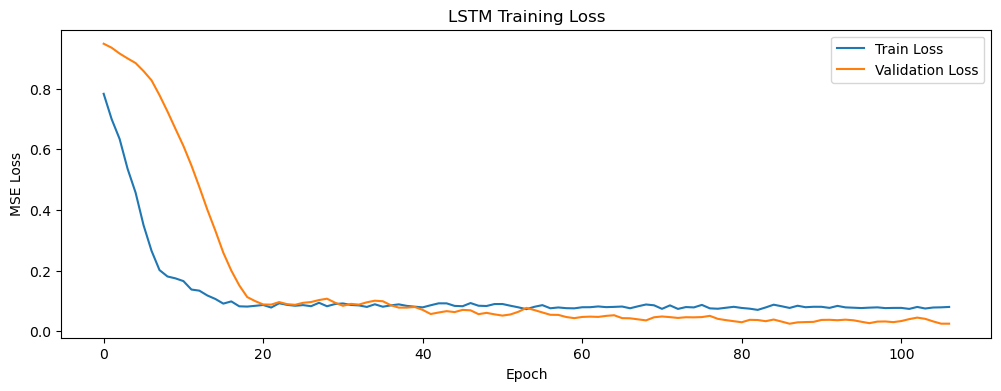

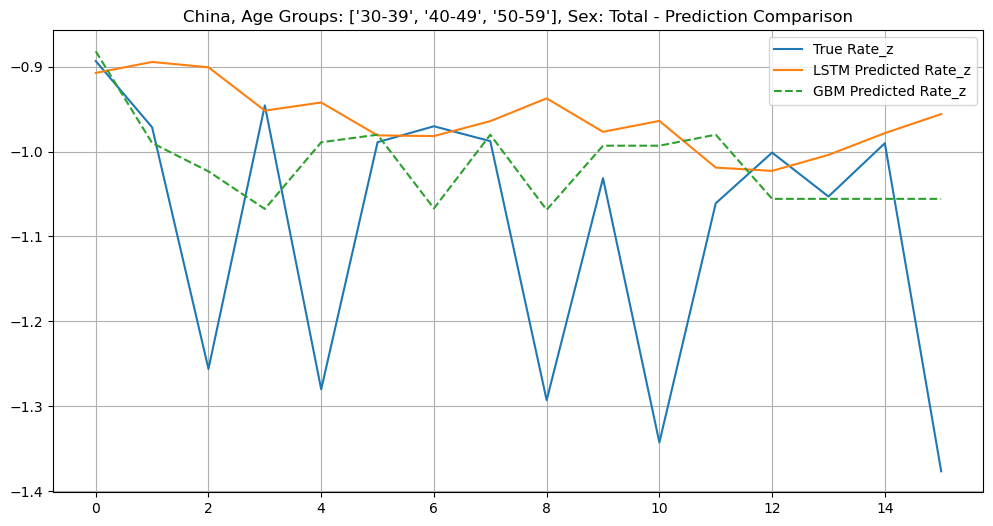

In [15]:
lags = 5  
country_sel = 'China'  
sex_sel = 'Total'  
age_list = ['30-39', '40-49', '50-59']  

df_sub = agg_data[  
    (agg_data['Country'] == country_sel) &  
    (agg_data['Sex'] == sex_sel) &  
    (agg_data['Age.Range.10'].isin(age_list))  
].copy()  
df_sub = df_sub.sort_values('Year').reset_index(drop=True)  

target_col = 'Rate_z'  

def create_lag_features_original(df, lag_steps):  
    df_lagged = df.copy()  
    for lag in range(1, lag_steps + 1):  
        df_lagged[f'lag_{lag}'] = df_lagged[target_col].shift(lag)  
    df_lagged = df_lagged.dropna().reset_index(drop=True)  
    return df_lagged  

df_lagged = create_lag_features_original(df_sub, lags)  

feature_cols = [f'lag_{i}' for i in range(1, lags + 1)]  

X = df_lagged[feature_cols].values  
y = df_lagged[target_col].values    

if len(df_lagged) < 10:  
    print(f"Too few samples: {len(df_lagged)} records, not suitable for training.")  
else:  
    split_ratio = 0.8  
    split_idx = int(len(df_lagged) * split_ratio)  

    X_lstm = X.reshape((X.shape[0], lags, 1))  

    X_train, X_test = X_lstm[:split_idx], X_lstm[split_idx:]  
    y_train, y_test = y[:split_idx], y[split_idx:]  

    model = Sequential([  
        LSTM(64, return_sequences=True, input_shape=(lags,1)),  
        Dropout(0.1),  
        LSTM(32),  
        Dropout(0.1),  
        Dense(16, activation='relu'),  
        Dense(1)  
    ])  

    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0005))  
    model.summary()  

    early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  

    history = model.fit(  
        X_train, y_train,  
        epochs=200,  
        batch_size=8,  
        validation_split=0.1,  
        callbacks=[early_stop],  
        verbose=1  
    )  

    y_pred = model.predict(X_test).flatten()  
    mse = mean_squared_error(y_test, y_pred)  
    print(f"LSTM MSE on original target: {mse:.4f}")  

    gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.08, max_depth=3, random_state=42)  
    gbm.fit(X[:split_idx], y[:split_idx])  
    y_pred_gbm = gbm.predict(X[split_idx:])  
    mse_gbm = mean_squared_error(y[split_idx:], y_pred_gbm)  
    print(f"GBM MSE on original target: {mse_gbm:.4f}")  

    plt.figure(figsize=(12, 4))  
    plt.plot(history.history['loss'], label='Train Loss')  
    plt.plot(history.history['val_loss'], label='Validation Loss')  
    plt.title('LSTM Training Loss')  
    plt.xlabel('Epoch')  
    plt.ylabel('MSE Loss')  
    plt.legend()  
    plt.show()  

    plt.figure(figsize=(12, 6))  
    plt.plot(y_test, label='True Rate_z')  
    plt.plot(y_pred, label='LSTM Predicted Rate_z')  
    plt.plot(range(len(y_test)), y_pred_gbm, label='GBM Predicted Rate_z', linestyle='--')  
    plt.title(f'{country_sel}, Age Groups: {age_list}, Sex: {sex_sel} - Prediction Comparison')  
    plt.legend()  
    plt.grid(True)  
    plt.show()  

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 5, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 1.0350 - val_loss: 0.5278
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9766 - val_loss: 0.5137
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9404 - val_loss: 0.4972
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6921 - val_loss: 0.4804
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6822 - val_loss: 0.4598
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5741 - val_loss: 0.4337
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4636 - val_loss: 0.4064
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3946 - val_loss: 0.3823
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3004 - val_loss: 0.3701
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2844 - val_loss: 0.3848
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2059 - val_loss: 0.4364
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2428 - val_loss: 0.5013


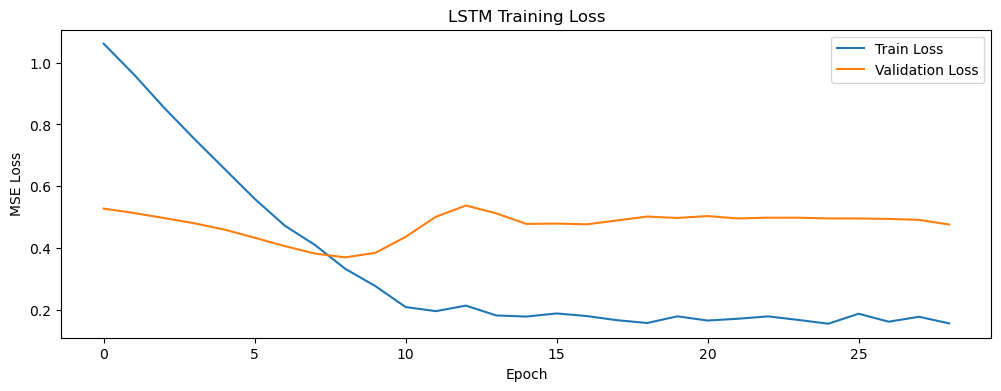

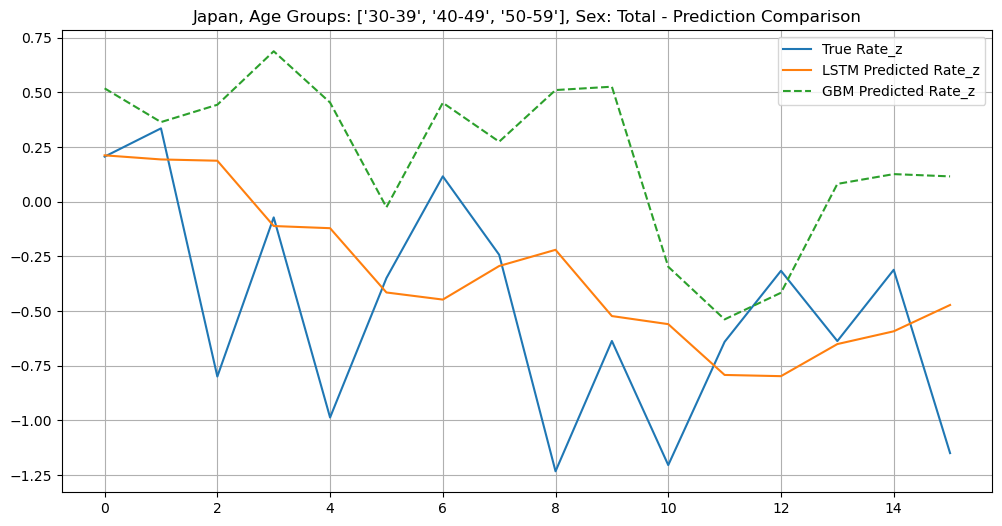

In [17]:
lags = 5  
country_sel = 'Japan'  
sex_sel = 'Total'  
age_list = ['30-39', '40-49', '50-59']  

df_sub = agg_data[  
    (agg_data['Country'] == country_sel) &  
    (agg_data['Sex'] == sex_sel) &  
    (agg_data['Age.Range.10'].isin(age_list))  
].copy()  
df_sub = df_sub.sort_values('Year').reset_index(drop=True)  

target_col = 'Rate_z'  

def create_lag_features_original(df, lag_steps):  
    df_lagged = df.copy()  
    for lag in range(1, lag_steps + 1):  
        df_lagged[f'lag_{lag}'] = df_lagged[target_col].shift(lag)  
    df_lagged = df_lagged.dropna().reset_index(drop=True)  
    return df_lagged  

df_lagged = create_lag_features_original(df_sub, lags)  

feature_cols = [f'lag_{i}' for i in range(1, lags + 1)]  

X = df_lagged[feature_cols].values  
y = df_lagged[target_col].values    

if len(df_lagged) < 10:  
    print(f"Too few samples: {len(df_lagged)} records, not suitable for training.")  
else:  
    split_ratio = 0.8  
    split_idx = int(len(df_lagged) * split_ratio)  

    X_lstm = X.reshape((X.shape[0], lags, 1))  

    X_train, X_test = X_lstm[:split_idx], X_lstm[split_idx:]  
    y_train, y_test = y[:split_idx], y[split_idx:]  

    model = Sequential([  
        LSTM(64, return_sequences=True, input_shape=(lags,1)),  
        Dropout(0.1),  
        LSTM(32),  
        Dropout(0.1),  
        Dense(16, activation='relu'),  
        Dense(1)  
    ])  

    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0005))  
    model.summary()  

    early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  

    history = model.fit(  
        X_train, y_train,  
        epochs=200,  
        batch_size=8,  
        validation_split=0.1,  
        callbacks=[early_stop],  
        verbose=1  
    )  

    y_pred = model.predict(X_test).flatten()  
    mse = mean_squared_error(y_test, y_pred)  
    print(f"LSTM MSE on original target: {mse:.4f}")  

    gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.08, max_depth=3, random_state=42)  
    gbm.fit(X[:split_idx], y[:split_idx])  
    y_pred_gbm = gbm.predict(X[split_idx:])  
    mse_gbm = mean_squared_error(y[split_idx:], y_pred_gbm)  
    print(f"GBM MSE on original target: {mse_gbm:.4f}")  

    plt.figure(figsize=(12, 4))  
    plt.plot(history.history['loss'], label='Train Loss')  
    plt.plot(history.history['val_loss'], label='Validation Loss')  
    plt.title('LSTM Training Loss')  
    plt.xlabel('Epoch')  
    plt.ylabel('MSE Loss')  
    plt.legend()  
    plt.show()  

    plt.figure(figsize=(12, 6))  
    plt.plot(y_test, label='True Rate_z')  
    plt.plot(y_pred, label='LSTM Predicted Rate_z')  
    plt.plot(range(len(y_test)), y_pred_gbm, label='GBM Predicted Rate_z', linestyle='--')  
    plt.title(f'{country_sel}, Age Groups: {age_list}, Sex: {sex_sel} - Prediction Comparison')  
    plt.legend()  
    plt.grid(True)  
    plt.show()  